In [3]:
import json
import numpy as np
import torch

In [4]:
def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

### painting dataset ###

In [5]:
# read the data
json_file_path1 = "search_paintings.json"
json_file_path2 = "search_text_paintings.json"
image_dict = load_json(json_file_path1)
text_dict = load_json(json_file_path2)

In [6]:
print(len(image_dict))
print(len(text_dict))

54
6


In [7]:
result = dict()

image_embeddings = list(image_dict.values())
image_embeddings_all = torch.cat([torch.tensor(image_embeddings[i]) for i in range(len(image_embeddings))])

for key, value in text_dict.items():
    query_embeddings = torch.tensor(value)
    scores = torch.softmax(image_embeddings_all @ query_embeddings.T, dim=0)
    max_index = torch.argmax(scores)
    best_match = list(image_dict.keys())[max_index]
    result[key] = best_match

In [8]:
result

{'a rococo oil painting': 'painting-oil-rococo-6.jpg',
 'a baroque oil painting': 'painting-oil-baroque-6.jpg',
 'a impressionism oil painting': 'painting-oil-impressionism-6.jpg',
 'a renaissance oil painting': 'painting-oil-renaissance-10.jpg',
 'a romanticism oil painting': 'painting-oil-romanticism-10.jpg',
 'a sketch': 'painting-oil-impressionism-3.jpg'}

In [9]:
result_new = dict()

image_embeddings = list(image_dict.values())
image_embeddings_all = torch.cat([torch.tensor(image_embeddings[i]) for i in range(len(image_embeddings))])

for key, value in text_dict.items():
    query_embeddings = torch.tensor(value)
    scores = torch.softmax(image_embeddings_all @ query_embeddings.T, dim=0)
    # Get the indices of the top 3 values
    top_indices = torch.topk(scores.flatten(), k=3, dim=0).indices.tolist()
    # Get the corresponding image names
    best_matches = [list(image_dict.keys())[index] for index in top_indices]
    result_new[key] = best_matches

In [10]:
result_new

{'a rococo oil painting': ['painting-oil-rococo-6.jpg',
  'painting-oil-rococo-5.jpg',
  'painting-oil-baroque-6.jpg'],
 'a baroque oil painting': ['painting-oil-baroque-6.jpg',
  'painting-oil-rococo-6.jpg',
  'painting-oil-baroque-5.jpg'],
 'a impressionism oil painting': ['painting-oil-impressionism-6.jpg',
  'painting-oil-impressionism-2.jpg',
  'painting-oil-impressionism-10.jpg'],
 'a renaissance oil painting': ['painting-oil-renaissance-10.jpg',
  'painting-oil-baroque-6.jpg',
  'painting-oil-renaissance-6.jpg'],
 'a romanticism oil painting': ['painting-oil-romanticism-10.jpg',
  'painting-oil-romanticism-3.jpg',
  'painting-oil-romanticism-9.jpg'],
 'a sketch': ['painting-oil-impressionism-3.jpg',
  'painting-oil-rococo-6.jpg',
  'painting-oil-impressionism-7.jpg']}

### instrument dataset ###

In [11]:
# read the data
json_file_path1 = "search_instruments.json"
json_file_path2 = "search_audio_instruments.json"
image_dict = load_json(json_file_path1)
text_dict = load_json(json_file_path2)

In [12]:
print(len(image_dict))
print(len(text_dict))

30
30


In [13]:
result = dict()

image_embeddings = list(image_dict.values())
image_embeddings_all = torch.cat([torch.tensor(image_embeddings[i]) for i in range(len(image_embeddings))])

for key, value in text_dict.items():
    query_embeddings = torch.tensor(value)
    scores = torch.softmax(image_embeddings_all @ query_embeddings.T, dim=0)
    max_index = torch.argmax(scores)
    best_match = list(image_dict.keys())[max_index]
    result[key] = best_match

In [14]:
result

{'instrument-SouthAmerica-string-cuato-1.wav': 'instrument-Chinese-string-dulcimer-1.jpg',
 'instrument-SouthAmerica-percussion-marimba-1.wav': 'instrument-SouthAmerica-percussion-marimba-1.jpg',
 'instrument-Chinese-percussion-drum-1.wav': 'instrument-Chinese-string-gaohu-1.jpg',
 'instrument-Europea-woodwind-flute-1.wav': 'instrument-Europea-woodwind-flute-1.jpg',
 'instrument-Europea-keyboard-piano-1.wav': 'instrument-Europea-keyboard-piano-1.jpg',
 'instrument-Europea-brass-trumpet-1.wav': 'instrument-Europea-brass-trombone-1.jpg',
 'instrument-Chinese-blowing-flute-1.wav': 'instrument-Europea-woodwind-oboe-1.jpg',
 'instrument-Chinese-percussion-gongs-1.wav': 'instrument-Chinese-percussion-gongs-1.jpg',
 'instrument-Chinese-string-harp-1.wav': 'instrument-Chinese-string-guzheng-1.jpg',
 'instrument-Chinese-string-dulcimer-1.wav': 'instrument-Chinese-string-dulcimer-1.jpg',
 'instrument-Europea-string-harp-1.wav': 'instrument-Chinese-string-harp-1.jpg',
 'instrument-Chinese-blowing

In [16]:
total = 30
area = 0
style = 0
name = 0

for key, value in result.items():
    key_pool = key.split('-')
    value_pool = value.split('-')
    if key_pool[1] == value_pool[1]:
        area += 1
    if key_pool[2] == value_pool[2]:
        style += 1
    if key_pool[1] == value_pool[1] and key_pool[2] == value_pool[2] and key_pool[3] == value_pool[3]:
        name += 1

In [17]:
print(area)
print(style)
print(name)

23
25
16


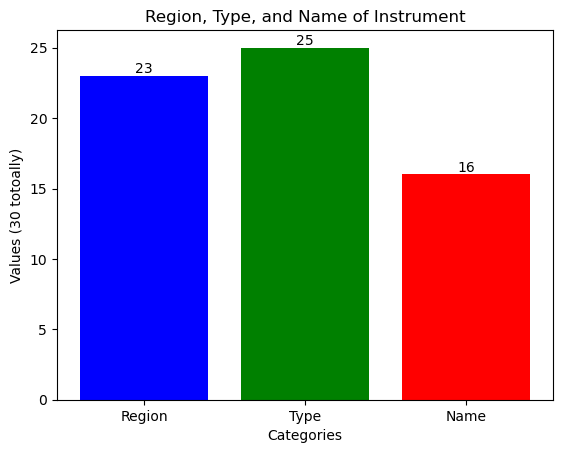

In [22]:
import matplotlib.pyplot as plt

# histogram
categories = ['Region', 'Type', 'Name']
values = [area, style, name]

fig, ax = plt.subplots()
bars = ax.bar(categories, values, color=['blue', 'green', 'red'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Region, Type, and Name of Instrument')
plt.xlabel('Categories')
plt.ylabel('Values (30 totoally)')
plt.show()

### clothing time dataset ###

In [23]:
# read the data
json_file_path1 = "search_clothing_time.json"
json_file_path2 = "search_text_clothing_time.json"
image_dict = load_json(json_file_path1)
text_dict = load_json(json_file_path2)

In [24]:
print(len(image_dict))
print(len(text_dict))

21
4


In [25]:
result = dict()

image_embeddings = list(image_dict.values())
image_embeddings_all = torch.cat([torch.tensor(image_embeddings[i]) for i in range(len(image_embeddings))])

for key, value in text_dict.items():
    query_embeddings = torch.tensor(value)
    scores = torch.softmax(image_embeddings_all @ query_embeddings.T, dim=0)
    max_index = torch.argmax(scores)
    best_match = list(image_dict.keys())[max_index]
    result[key] = best_match

In [26]:
result

{'a 17th to 19th Century clothing': 'clothing-17thto19thCentury-5.jpg',
 'a 20th century clothing': 'clothing-20thCentury-3.jpg',
 'an ancient clothing': 'clothing-medieval-2.jpg',
 'a medieval clothing': 'clothing-medieval-3.jpg'}

In [27]:
result_new = dict()

image_embeddings = list(image_dict.values())
image_embeddings_all = torch.cat([torch.tensor(image_embeddings[i]) for i in range(len(image_embeddings))])

for key, value in text_dict.items():
    query_embeddings = torch.tensor(value)
    scores = torch.softmax(image_embeddings_all @ query_embeddings.T, dim=0)
    # Get the indices of the top 3 values
    top_indices = torch.topk(scores.flatten(), k=3, dim=0).indices.tolist()
    # Get the corresponding image names
    best_matches = [list(image_dict.keys())[index] for index in top_indices]
    result_new[key] = best_matches

In [28]:
result_new

{'a 17th to 19th Century clothing': ['clothing-17thto19thCentury-5.jpg',
  'clothing-17thto19thCentury-4.jpg',
  'clothing-medieval-3.jpg'],
 'a 20th century clothing': ['clothing-20thCentury-3.jpg',
  'clothing-17thto19thCentury-5.jpg',
  'clothing-20thCentury-5.jpg'],
 'an ancient clothing': ['clothing-medieval-2.jpg',
  'clothing-ancient-1.jpg',
  'clothing-ancient-4.jpg'],
 'a medieval clothing': ['clothing-medieval-3.jpg',
  'clothing-medieval-2.jpg',
  'clothing-medieval-6.jpg']}

### area image dataset ###

In [29]:
# read the data
json_file_path1 = "search_area.json"
json_file_path2 = "search_text_area.json"
image_dict = load_json(json_file_path1)
text_dict = load_json(json_file_path2)

In [30]:
print(len(image_dict))
print(len(text_dict))

125
9


In [31]:
result = dict()

image_embeddings = list(image_dict.values())
image_embeddings_all = torch.cat([torch.tensor(image_embeddings[i]) for i in range(len(image_embeddings))])

for key, value in text_dict.items():
    query_embeddings = torch.tensor(value)
    scores = torch.softmax(image_embeddings_all @ query_embeddings.T, dim=0)
    max_index = torch.argmax(scores)
    best_match = list(image_dict.keys())[max_index]
    result[key] = best_match

In [32]:
result

{'an African clothing': 'clothing-African-3.jpg',
 'an American clothing': 'clothing-European-7.jpg',
 'an Asian clothing': 'clothing-Asian-3.jpg',
 'an European clothing': 'clothing-European-7.jpg',
 'a Middle Eastern clothing': 'clothing-MiddleEastern-2.jpg',
 'an American food': 'food-Americas-14.jpg',
 'an Asian food': 'food-Asia-8.jpg',
 'an European food': 'food-Americas-11.jpg',
 'a Middle Eastern food': 'food-MiddleEastern-23.jpg'}

In [33]:
result_new = dict()

image_embeddings = list(image_dict.values())
image_embeddings_all = torch.cat([torch.tensor(image_embeddings[i]) for i in range(len(image_embeddings))])

for key, value in text_dict.items():
    query_embeddings = torch.tensor(value)
    scores = torch.softmax(image_embeddings_all @ query_embeddings.T, dim=0)
    # Get the indices of the top 3 values
    top_indices = torch.topk(scores.flatten(), k=3, dim=0).indices.tolist()
    # Get the corresponding image names
    best_matches = [list(image_dict.keys())[index] for index in top_indices]
    result_new[key] = best_matches

In [34]:
result_new

{'an African clothing': ['clothing-African-3.jpg',
  'clothing-African-5.jpg',
  'clothing-African-2.jpg'],
 'an American clothing': ['clothing-European-7.jpg',
  'clothing-Americas-1.jpg',
  'clothing-Americas-7.jpg'],
 'an Asian clothing': ['clothing-Asian-3.jpg',
  'clothing-Asian-5.jpg',
  'clothing-Asian-2.jpg'],
 'an European clothing': ['clothing-European-7.jpg',
  'clothing-European-2.jpg',
  'clothing-European-6.jpg'],
 'a Middle Eastern clothing': ['clothing-MiddleEastern-2.jpg',
  'clothing-MiddleEastern-4.jpg',
  'clothing-MiddleEastern-3.jpg'],
 'an American food': ['food-Americas-14.jpg',
  'food-Americas-15.jpg',
  'food-Americas-22.jpg'],
 'an Asian food': ['food-Asia-8.jpg', 'food-Asia-10.jpg', 'food-Asia-19.jpg'],
 'an European food': ['food-Americas-11.jpg',
  'food-European-16.jpg',
  'food-European-1.jpg'],
 'a Middle Eastern food': ['food-MiddleEastern-23.jpg',
  'food-MiddleEastern-3.jpg',
  'food-MiddleEastern-9.jpg']}

In [35]:
result_new = dict()

image_embeddings = list(image_dict.values())
image_embeddings_all = torch.cat([torch.tensor(image_embeddings[i]) for i in range(len(image_embeddings))])

for key, value in text_dict.items():
    query_embeddings = torch.tensor(value)
    scores = torch.softmax(image_embeddings_all @ query_embeddings.T, dim=0)
    # Get the indices of the top 5 values
    top_indices = torch.topk(scores.flatten(), k=5, dim=0).indices.tolist()
    # Get the corresponding image names
    best_matches = [list(image_dict.keys())[index] for index in top_indices]
    result_new[key] = best_matches

In [36]:
result_new

{'an African clothing': ['clothing-African-3.jpg',
  'clothing-African-5.jpg',
  'clothing-African-2.jpg',
  'clothing-African-1.jpg',
  'clothing-Asian-6.jpg'],
 'an American clothing': ['clothing-European-7.jpg',
  'clothing-Americas-1.jpg',
  'clothing-Americas-7.jpg',
  'clothing-European-2.jpg',
  'clothing-Asian-3.jpg'],
 'an Asian clothing': ['clothing-Asian-3.jpg',
  'clothing-Asian-5.jpg',
  'clothing-Asian-2.jpg',
  'clothing-MiddleEastern-2.jpg',
  'clothing-Asian-4.jpg'],
 'an European clothing': ['clothing-European-7.jpg',
  'clothing-European-2.jpg',
  'clothing-European-6.jpg',
  'clothing-European-5.jpg',
  'clothing-Asian-3.jpg'],
 'a Middle Eastern clothing': ['clothing-MiddleEastern-2.jpg',
  'clothing-MiddleEastern-4.jpg',
  'clothing-MiddleEastern-3.jpg',
  'clothing-Asian-3.jpg',
  'clothing-MiddleEastern-1.jpg'],
 'an American food': ['food-Americas-14.jpg',
  'food-Americas-15.jpg',
  'food-Americas-22.jpg',
  'food-European-2.jpg',
  'food-Americas-5.jpg'],
 'a